<div style="text-align: center;">
    <h2>DATA 606 Final Project</h2>
</div>

<div style="text-align: center;color: red;">
    <h1>Breast Cancer Prediction</h1>
</div>

<div style="text-align: right;">
    <h3><em>- Kurre Sai Chand </em></h3>
</div>

<div style="text-align: right;">
    <h3><em>Guided by- Dr. Chaojie (Jay) Wang </em></h3>
</div>

Breast Cancer is the most common cancer, and it has recently been a very highly reported skin cancer type. In the world of healthcare, Breast Cancer is a current hot-button issue. Our modern and lethargic lifestyle could be the main reason. This type of cancer can occur in both men and women. Still, as per scientific investigation, Women are 2X susceptible to Breast Cancer, so diagnosing cancer in early stages is essential. Based on an imaging procedure called Fine Needle Aspiration procedure, an expert will classify the cells as malignant or benign. But how can we diagnose breast cancer with machine learning? That's the question of the hour. With image processing techniques or manual measurements, cell characteristics are measured from Fine Needle aspiration images, and these characteristics will be used to classify the cells into Benign and Cancerous.

---


<div style="text-align: center;color: blue;">
    <h2>Steps</h2>
</div>

- Step 1: Import Libraries 
- Step 2: Loading the Data
- Step 3: Cleaning the Data
> - Step 3.1: knowing the datatypes 
> - Step 3.2: knowing the shape of data
> - Step 3.3: knowing all the column names
> - Step 3.4: knowing the stastistical details about our data
> - Step 3.5: Checking the null values
> - Step 3.6: Deleting unwanted columns
> - Step 3.7: Checking whether any rows or columns are identical 
> - Step 3.8: Checking the number of categeorical values
- Step 4: Feature Engineering
> - Step 4.1: Replacing categeorical variables with numerical
> - Step 4.2: Generating Meta Data for our original data
> - Step 4.3: writing function for scaling(normalization & standardization) data
> - Step 4.4: writing function for dimensionality reduction using Principle component analysis
> - Step 4.5: applying standardization and PCA to our data
> - Step 4.6: Creating final dataframe
- Step 5: Visualizations
> - graph 5.1: Box Plot for value counts of Malignant and Benign
> - graph 5.2: Histogram of Radius Mean for Benign and Malignant Tumors
> - graph 5.3: Histogram of Smoothness Mean for Benign and Malignant Tumors
> - graph 5.4: Box Plot of Radius Mean and Texture Mean for Benign and Malignant Tumors
> - graph 5.5: Violin plot for our final data
> - graph 5.6: Heat map for our final data
- Step 6: Machine Learning Model
> - Logistic Regression
> - K-Nearest Neighbor
> - Random Forest Classification
> - Support Vector Classification
> - Decision Tree Classification
> - Gaussian Naive bayes

<div style="text-align: center;color: blue;">
    <h2>Loading the required libraries</h2>
</div>

In [1]:
# Loading necessary libraries
import numpy as np 
# Importing NumPy for numerical operations
import pandas as pd  
# Importing Pandas for data processing and CSV file I/O
import seaborn as sns 
# Importing Seaborn for data visualization
import matplotlib.pyplot as plt
# Importing Matplotlib for basic plotting
import plotly.express as px  
# Importing Plotly Express for interactive visualizations
import plotly.graph_objects as go 
# Importing Plotly Graph Objects for more customized visualizations
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder  
# Importing preprocessing tools from Scikit-Learn: MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA  
# Importing PCA (Principal Component Analysis) from Scikit-Learn for dimensionality reduction

<div style="text-align: center;color: blue;">
    <h2>Loading the Data</h2>
</div>

In [2]:
#Loading the data from BreastCancer_Data.csv into a df Data Frame
df = pd.read_csv("BreastCancer_Data.csv",header = 0)
#Printing the first 5 columns to check the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<div style="text-align: center;color: blue;">
    <h2>Data Cleaning</h2>
</div>

<div style="text-align: left;">
    <h5><strong>To Know the data type and the null values we use df.info()</strong></h5>
</div>

In [3]:
df.info() #to get information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


<div style="text-align: left;">
    <h5><strong>Shape of data</strong></h5>
</div>


In [4]:
# to Know the size of our data
df.shape

(569, 33)


<div style="text-align: right; color: green;">
    <h5><strong>Our data frame contains 569 rows and 33 columns</strong></h5>
</div>

<div style="text-align: left;">
    <h5><strong>Column Names</strong></h5>
</div>

In [5]:
# feature names as a list
col = df.columns       # .columns gives columns names in data
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')



<div style="text-align: left;">
    <h5><strong>Statistical idea about data</strong></h5>
</div>

In [6]:
#To know the numerical details like mean median mode min and max of the columns of data we use describe()
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN



<div style="text-align: left;">
    <h5><strong>Checking NULL values</strong></h5>
</div>

In [7]:
df.isnull().values.any() # checking null values

True


<div style="text-align: right; color: green;">
    <h5><strong>True indicates that our data set has null values</strong></h5>
</div>


<div style="text-align: left;">
    <h5><strong>To Know the data type and the null values we use df.info()</strong></h5>
</div>

In [8]:
df.isnull().sum() #number of null values in each column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:


<div style="text-align: right; color: green;">
    <h5><strong>Unnamed: 32 is the column with all NULL values so droping the column from the data frame</strong></h5>
</div>

In [9]:
df = df.drop("Unnamed: 32", axis=1) #Dropping Unnaned: 32 Column
#the deleted column is empty column


<div style="text-align: left;">
    <h5><strong>Checking whether any columns have the same value so that we drop extra column from the data frame</strong></h5>
</div>

In [10]:
#checking whether any columns have the same value
for this_column in df.columns:
    if (df[this_column].nunique()==1):
        print(this_column)

<div style="text-align: right; color: green;">
    <h5><strong>No two columns have same values</strong></h5>
</div>


<div style="text-align: left;">
    <h5><strong>Checking whether the id column is unique or not in order to drop extra rows</strong></h5>
</div>

In [11]:
df['id'].nunique()

569


<div style="text-align: right; color: green;">
    <h5><strong>the count of nunique matches with total number of rows, so every ID is unique and no need to drop any row</strong></h5>
</div>


<div style="text-align: left;">
    <h5><strong>To get the categeorical details of "diagonsis" column</strong></h5>
</div>

In [12]:
df['diagnosis'].nunique()

2


<div style="text-align: right; color: green;">
    <h5><strong>Basic observations:</strong></h5>
</div>
        <div style="text-align: right; color: green;">
    <h5><strong>1. Id is a unique field.</strong></h5>
</div>
        <div style="text-align: right; color: green;">
    <h5><strong>2. Unnamed: 32 is the empty column which is of no use, so we can drop that column.</strong></h5>
</div>
        <div style="text-align: right; color: green;">
    <h5><strong>3. Diagonsis Field contain only 2 values "M" and "B".</strong></h5>
</div>
        <div style="text-align: right; color: green;">
    <h5><strong>4. Data does not contain any null values.</strong></h5>
</div>

<div style="text-align: center;color: blue;">
    <h2>Feature Engineering</h2>
</div>


<div style="text-align: left;">
    <h5><strong>Replacing categorical values to numerical labels.</strong></h5>
</div>

In [13]:
# Replace the values in the 'diagnosis' column to numerical labels.
# 'Benign' is replaced with 0 and 'Malignant' is replaced with 1.
df['diagnosis'] = df['diagnosis'].replace({'Benign': 0, 'Malignant': 1})

# Display the DataFrame to see the changes.
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<div style="text-align: left;">
    <h5><strong>Generate meta data</strong></h5>
</div>


<div style="text-align: left;">
    <h5>Function Purpose</h5>
    <h8>This function's purpose is to provide a summary of important information about the columns in a given DataFrame. This summary aids in comprehending the dataset's structure and characteristics.</h8>
</div>

In [14]:
def generate_metadata(dataframe):
    """
    Generates a DataFrame containing metadata for the columns of the provided DataFrame.

    :param dataframe: DataFrame for which metadata will be generated.
    :return: DataFrame containing metadata.
    """

    # Create a dictionary containing metadata information for each column
    metadata = pd.DataFrame({
        'variable': dataframe.columns,              # Column names
        'type': dataframe.dtypes,                   # Data types of each column
        'null_count': dataframe.isnull().sum(),     # Count of null values in each column
        'null_percent': round((dataframe.isnull().sum() / len(dataframe))* 100,2),  # Percentage of null values
        'cardinality': dataframe.nunique(),        # Number of unique values in each column
    })
        
    # Reset the index for the metadata DataFrame
    metadata = metadata.reset_index(drop=True)
    

    return metadata

<div style="text-align: left;">
    <h5><strong>Normalization & Standardization</strong></h5>
</div>

<div style="text-align: left;">
    <h5>Normalization</h5>

**What is normalization?**

<h8>Normalization is a data preprocessing technique used in statistics and machine learning to rescale numerical variables to a standard range. Normalization is the process of transforming the features of a dataset so that they have a similar scale. This is important in various machine learning algorithms because it ensures that no single feature dominates due to its larger scale, preventing biases in the learning process of the model.</h8>


<div>
<h8>Normalization methods vary, but one popular approach is Min-Max normalization, which scales the data to a fixed range, typically [0, 1]. The following is how Min-Max normalization works:</h8>
</div>

<div>
<h8>1. Find the minimum (min) and maximum (max) values of the feature to be normalized.</h8>
</div>
<div>
<h8>2. For each value in the feature, apply the following formula:
normalized_value = (original_value - min)/(max - min)</h8>
</div>
<div>
<h8>The original values are scaled between 0 and 1 using this formula. If the original value is equal minimum value, the normalized value is zero; if it is equal to one, the normalized value is maximum value.</h8>
</div>

**Why to do normalization?**

1. Standardized Scale
2. Improved Convergence
3. Interpretability

<div style="text-align: left;">
    <h5>Standardization</h5>

**What is Standardization?**

<h8>Another data preprocessing technique used in machine learning and statistics is standardization. Standardization, as opposed to normalization, rescales features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. This is also referred to as z-score normalization or z-score standardization.</h8>


<div>
<h8>1. Calculate the mean (μ) and standard deviation (σ) of the feature. </h8>
</div>
<div>
<h8>2. For each value in the feature, apply the following formula:
Standardized_value = (original_value - μ)/σ</h8>
</div>
<div>
<h8>This formula scales the original values based on how far they deviate from the mean. A positive standardized value indicates that the original value is greater than the mean, while a negative value indicates that it is less than the mean.</h8>
</div>

**Why to do Standardization?**

1. Mean Centering
2. Equal Scales
3. Preservation of Relative Relationships


<div style="text-align: left;">
    <h5>Function Purpose</h5>
    <h8>This function's purpose is to scale (normalize or standardize) the numerical columns in a given DataFrame. Scaling is a common preprocessing step in machine learning that ensures all features have the same scale, which can improve machine learning algorithm performance and training stability.</h8>
</div>

In [15]:
def scale_numeric_columns(dataframe, method='normalize'):
    """
    Scales (normalizes or standardizes) the numeric columns in the provided DataFrame.

    :param dataframe: The DataFrame containing numeric columns to be scaled.
    :param method: The scaling method to use ('normalize' or 'standardize'). Default is 'normalize'.
    :return: A new DataFrame with the selected numeric columns scaled as specified.
    """
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_scaled = dataframe.copy()
    
    # Select numeric columns based on data type
    numeric_columns = df_scaled.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
    
    if method == 'normalize':
        # Initialize Min-Max Scaler for normalization
        scaler = MinMaxScaler()
    elif method == 'standardize':
        # Initialize StandardScaler for standardization
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid method. Use 'normalize' or 'standardize'.")
    
    # Apply the chosen scaler to the selected numeric columns
    df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])
    
    return df_scaled

<div style="text-align: left; color: red;">
    <h5><strong>Principle Component Analysis(PCA)</strong></h5>
</div>

Principal Component Analysis (PCA) is a technique for reducing dimensionality that is widely used in machine learning and data analysis. Its main goal is to keep as much information as possible while reducing the number of features (or dimensions) in a dataset. The original features are transformed into a new set of uncorrelated features known as principal components by PCA. These principal components are orthogonal to each other and are linear combinations of the original features.

**1. Variance:**
PCA seeks to maximize data variance along the new dimensions. High variance indicates that the data points are dispersed and provide useful information.

**2. Orthogonality:**
The primary components are orthogonal, which means they are uncorrelated. This ensures that the new features capture a variety of data aspects.

**3. Eigenvalues and Eigenvectors:**
PCA entails determining the eigenvalues and eigenvectors of the original data's covariance matrix. Eigenvalues represent the amount of variance explained by each principal component, whereas eigenvectors represent the component's direction in the original feature space.


**Advantages of PCA:**

1. Dimensionality Reduction
2. Noise Reduction
3. Visualization

<div style="text-align: left;">
    <h5>Function Purpose</h5>
    <h8>This function's purpose is to perform feature selection using Principal Component Analysis (PCA). PCA is a dimensionality reduction technique that identifies the most important features in data by projecting them onto a new coordinate system (principal components) in which the features are orthogonal (uncorrelated) and ordered by importance.</h8>
</div>

In [16]:
def select_features_by_pca(dataframe, target, n_components=None, top_n=1):
    """
    Select features using Principal Component Analysis (PCA).

    :param dataframe: The DataFrame containing features to be selected.
    :param target: The name of the target column.
    :param n_components: The number of principal components to retain. Default is None.
    :param top_n: The number of top features to select from each principal component. Default is 1.
    :return: A DataFrame containing selected features and the target column.
    """
    # Split the DataFrame into X (features) and y (target)
    X = dataframe.drop(columns=[target])
    y = dataframe[target]
    
    # Initialize PCA with the specified number of components
    pca_limited = PCA(n_components=n_components)
    
    # Fit PCA on the feature matrix (X)
    pca_limited.fit(X)
    
    # Get the principal components
    pca_limited_components = pca_limited.components_
    
    # Create a DataFrame to store the principal components
    pca_limited_features = pd.DataFrame(pca_limited_components, columns=X.columns,
                                        index=['PC'+str(i) for i in range(1, pca_limited_components.shape[0]+1)]).transpose()
    
    # Initialize a dictionary to store top features for each principal component
    top_components = {}
    
    # Loop through each principal component
    for component in pca_limited_features.columns:
        # Sort the components by absolute value in descending order
        sorted_components = pca_limited_features[component].abs().sort_values(ascending=False)
        
        # Select the top 'top_n' features
        top_components[component] = sorted_components.index[:top_n].tolist()
    
    # Create a list of selected features by combining top features from all principal components
    list_select_pca = list(set([item for sublist in top_components.values() for item in sublist]))
    
    # Calculate PCA variance explained and cumulative variance explained
    pca_variance = pca_limited.explained_variance_
    pca_cumulative_variance = np.cumsum(pca_limited.explained_variance_ratio_)
    
    # Plot PCA variance explained
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca_variance)+1), pca_variance, 'o-', markersize=8)
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue (Explained Variance)')
    plt.title('Scree Plot')
    plt.xticks(range(1, len(pca_variance)+1))
    plt.grid(True)
    plt.show()
    
    # Plot cumulative variance explained
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca_cumulative_variance)+1), pca_cumulative_variance, 'o-', markersize=8)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Components')
    plt.xticks(range(1, len(pca_cumulative_variance)+1))
    plt.grid(True)
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
    plt.axhline(y=0.99, color='g', linestyle='--', label='99% Explained Variance')
    plt.legend(loc='best')
    plt.show()
    
    # Print selected and discarded columns
    print("Selected Columns:", list_select_pca)
    print("Discarded Columns:", [col for col in X.columns if col not in list_select_pca])
    
    # Create a new DataFrame with selected features and the target column
    df_selected = dataframe[list_select_pca + [target]]
    
    return df_selected

<div style="text-align: left;">
    <h5><strong>Generating Metadata For our Data</strong></h5>
</div>

In [17]:
# Generate metadata for the original DataFrame using the defined function
df_metadata = generate_metadata(df)

# Display the metadata for the original DataFrame
df_metadata 

,variable,type,null_count,null_percent,cardinality
0,id,int64,0,0.0,569
1,diagnosis,object,0,0.0,2
2,radius_mean,float64,0,0.0,456
3,texture_mean,float64,0,0.0,479
4,perimeter_mean,float64,0,0.0,522
5,area_mean,float64,0,0.0,539
6,smoothness_mean,float64,0,0.0,474
7,compactness_mean,float64,0,0.0,537
8,concavity_mean,float64,0,0.0,537
9,concave points_mean,float64,0,0.0,542


This metadata contains critical information about each column in the DataFrame, such as the data type, number of null values, percentage of null values, and number of unique values (cardinality). 

<div style="text-align: left;">
    <h5><strong>Dropping Diagonsis and id columns</strong></h5>
</div>

In [18]:
# List of columns to be dropped from the DataFrame
list_drop_columns = ['id', 'diagnosis']

# Create a new DataFrame df_cancer by dropping specified columns from the original DataFrame df
# 'axis=1' specifies that columns should be dropped, 'columns=list_drop_columns' lists the columns to be dropped
df_cancer = df.drop(axis=1, columns=list_drop_columns)

# Display the prepared DataFrame df_cancer after dropping specified columns
df_cancer

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<div style="text-align: left;">
    <h5><strong>Generating Metadata For our df_metadata</strong></h5>
</div>

In [19]:
# Generate metadata for the prepared DataFrame df_cancer using the generate_metadata function
df_metadata = generate_metadata(df_cancer)

# Display the metadata for the prepared DataFrame df_cancer
df_metadata

,variable,type,null_count,null_percent,cardinality
0,radius_mean,float64,0,0.0,456
1,texture_mean,float64,0,0.0,479
2,perimeter_mean,float64,0,0.0,522
3,area_mean,float64,0,0.0,539
4,smoothness_mean,float64,0,0.0,474
5,compactness_mean,float64,0,0.0,537
6,concavity_mean,float64,0,0.0,537
7,concave points_mean,float64,0,0.0,542
8,symmetry_mean,float64,0,0.0,432
9,fractal_dimension_mean,float64,0,0.0,499



<div style="text-align: left;">
    <h5><strong>Normalizing our data frame</strong></h5>
</div>

In [20]:
# Scale the numeric columns of the DataFrame df_cancer using the scale_numeric_columns function.
# The default scaling method used here is normalization.
df_cancer_normal = scale_numeric_columns(df_cancer)  

# Display the DataFrame df_cancer_preparation_normal after normalizing the numeric columns.
df_cancer_normal

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315



<div style="text-align: left;">
    <h5><strong>Standardizing our data frame</strong></h5>
</div>

In [21]:
# Scale the numeric columns of the DataFrame df_cancer using the scale_numeric_columns function.
# The method parameter is explicitly set to 'standardize', indicating standardization as the scaling method.
# The default method if not specified is 'normalize'.
df_cancer_standard = scale_numeric_columns(df_cancer, method='standardize')  

# Display the DataFrame df_cancer_standard after standardizing the numeric columns.
df_cancer_standard

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635



<div style="text-align: left;">
    <h5><strong>Adding diagonsis column to our satndardized data frame</strong></h5>
</div>

In [22]:
# Merge the DataFrame containing standardized numeric columns (df_cancer_standard)
# with the 'diagnosis' column from the original DataFrame (df).
# The merge is performed based on the indexes of both DataFrames (left_index=True, right_index=True) and using an inner join (how='inner').
df_cancer_selection_standard = pd.merge(df_cancer_standard, df[['diagnosis']], left_index=True, right_index=True, how='inner')

# Display the resulting DataFrame df_cancer_selection_standard after the merge operation.
df_cancer_selection_standard

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,M
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,M
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,M
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,M


<div style="text-align: left;">
    <h5><strong>Generating Metadata For our Standardized data</strong></h5>
</div>

In [23]:
# Generate metadata for the DataFrame containing standardized numeric columns (df_cancer_standard)
# using the generate_metadata function.
df_metadata_standard = generate_metadata(df_cancer_standard)

# Display the metadata for the standardized DataFrame df_cancer_standard.
df_metadata_standard


,variable,type,null_count,null_percent,cardinality
0,radius_mean,float64,0,0.0,456
1,texture_mean,float64,0,0.0,479
2,perimeter_mean,float64,0,0.0,522
3,area_mean,float64,0,0.0,539
4,smoothness_mean,float64,0,0.0,474
5,compactness_mean,float64,0,0.0,537
6,concavity_mean,float64,0,0.0,537
7,concave points_mean,float64,0,0.0,542
8,symmetry_mean,float64,0,0.0,432
9,fractal_dimension_mean,float64,0,0.0,499



<div style="text-align: left;">
    <h5><strong>Applying **Principal Component Analysis**</strong></h5>
</div>

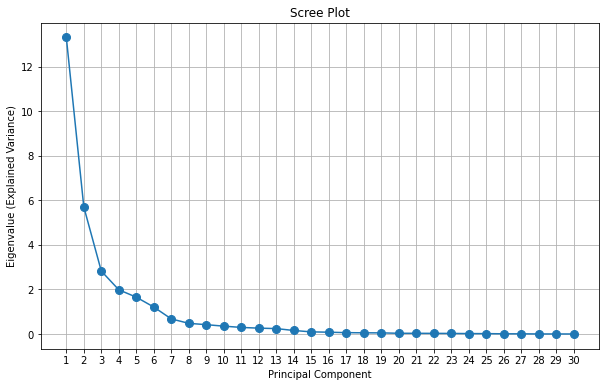

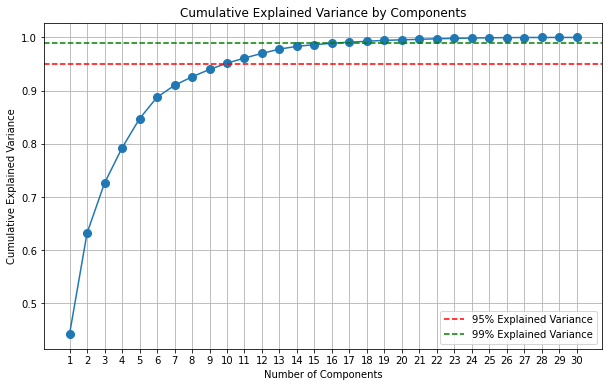

Selected Columns: ['fractal_dimension_mean', 'compactness_se', 'concave points_worst', 'texture_worst', 'area_se', 'radius_se', 'smoothness_mean', 'concave points_mean', 'fractal_dimension_worst', 'concave points_se', 'radius_worst', 'concavity_mean', 'radius_mean', 'texture_se', 'symmetry_worst', 'symmetry_mean', 'compactness_mean', 'compactness_worst', 'area_mean', 'perimeter_worst', 'smoothness_se', 'smoothness_worst', 'concavity_se']
Discarded Columns: ['texture_mean', 'perimeter_mean', 'perimeter_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'concavity_worst']


,fractal_dimension_mean,compactness_se,concave points_worst,texture_worst,area_se,radius_se,smoothness_mean,concave points_mean,fractal_dimension_worst,concave points_se,...,symmetry_worst,symmetry_mean,compactness_mean,compactness_worst,area_mean,perimeter_worst,smoothness_se,smoothness_worst,concavity_se,diagnosis
0,2.255747,1.316862,2.296076,-1.359293,2.487578,2.489734,1.568466,2.532475,1.937015,0.660820,...,2.750622,2.217515,3.283515,2.616665,0.984375,2.303601,-0.214002,1.307686,0.724026,M
1,-0.868652,-0.692926,1.087084,-0.369203,0.742402,0.499255,-0.826962,0.548144,0.281190,0.260162,...,-0.243890,0.001392,-0.487072,-0.430444,1.908708,1.535126,-0.605351,-0.375612,-0.440780,M
2,-0.398008,0.814974,1.955000,-0.023974,1.181336,1.228676,0.942210,2.037231,0.201391,1.424827,...,1.152255,0.939685,1.052926,1.082932,1.558884,1.347475,-0.297005,0.527407,0.213076,M
3,4.910919,2.744280,2.175786,0.133984,-0.288378,0.326373,3.283553,1.451707,4.935010,1.115007,...,6.046041,2.867383,3.402909,3.893397,-0.764464,-0.249939,0.689702,3.394275,0.819518,M
4,-0.562450,-0.048520,0.729259,-1.466770,1.190357,1.270543,0.280372,1.428493,-0.397100,1.144205,...,-0.868353,-0.009560,0.539340,-0.313395,1.826229,1.338539,1.483067,0.220556,0.828471,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.931027,0.191805,1.629151,0.117700,2.604187,2.782080,1.041842,2.320965,-0.709091,2.067178,...,-1.360158,-0.312589,0.219060,-0.273318,2.343856,1.752563,1.086384,0.378365,0.666001,M
565,-1.058611,-0.069758,0.733827,2.047399,1.291565,1.300499,0.102458,1.263669,-0.973978,0.808431,...,-0.531855,-0.217664,-0.017833,-0.394820,1.723842,1.421940,-0.424010,-0.691230,0.252202,M
566,-0.895587,0.661277,0.414069,1.374854,0.180698,0.184892,-0.840484,0.105777,-0.318409,0.612157,...,-1.104549,-0.809117,-0.038680,0.350735,0.577953,0.579001,-0.379342,-0.809587,0.510827,M
567,1.043695,2.017716,2.289985,2.237926,1.009503,1.157935,1.525767,2.658866,2.219635,0.785721,...,1.919083,2.137194,3.272144,3.904848,1.735218,2.303601,-0.173000,1.430427,1.302285,M


In [24]:
# Perform Principal Component Analysis (PCA) on the standardized and selected features DataFrame (df_cancer_selection_standard).
# The 'diagnosis' column is considered as the target variable.
# The default values for n_components (None) and top_n (1) are used for PCA.
df_cancer_pca_standard = select_features_by_pca(df_cancer_selection_standard, 'diagnosis')

# Display the resulting DataFrame df_cancer_pca_standard after performing PCA and selecting features.
df_cancer_pca_standard


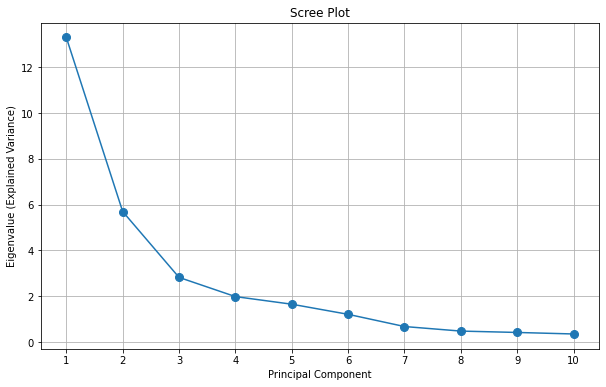

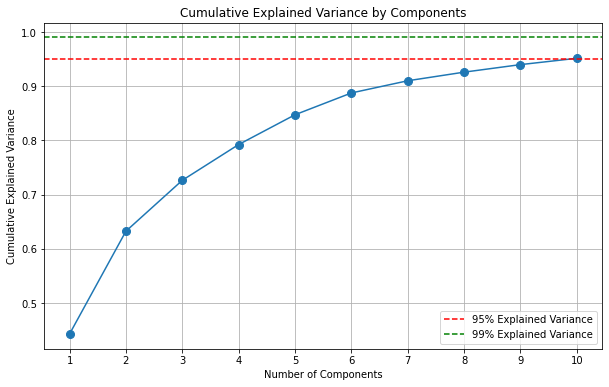

Selected Columns: ['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'smoothness_se', 'concavity_se', 'concave points_mean', 'fractal_dimension_worst', 'texture_worst', 'texture_se', 'symmetry_worst']
Discarded Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


,smoothness_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,concavity_se,concave points_mean,fractal_dimension_worst,texture_worst,texture_se,symmetry_worst,diagnosis
0,1.568466,2.217515,2.255747,-0.214002,0.724026,2.532475,1.937015,-1.359293,-0.565265,2.750622,M
1,-0.826962,0.001392,-0.868652,-0.605351,-0.440780,0.548144,0.281190,-0.369203,-0.876244,-0.243890,M
2,0.942210,0.939685,-0.398008,-0.297005,0.213076,2.037231,0.201391,-0.023974,-0.780083,1.152255,M
3,3.283553,2.867383,4.910919,0.689702,0.819518,1.451707,4.935010,0.133984,-0.110409,6.046041,M
4,0.280372,-0.009560,-0.562450,1.483067,0.828471,1.428493,-0.397100,-1.466770,-0.790244,-0.868353,M
...,...,...,...,...,...,...,...,...,...,...,...
564,1.041842,-0.312589,-0.931027,1.086384,0.666001,2.320965,-0.709091,0.117700,0.071025,-1.360158,M
565,0.102458,-0.217664,-1.058611,-0.424010,0.252202,1.263669,-0.973978,2.047399,2.260938,-0.531855,M
566,-0.840484,-0.809117,-0.895587,-0.379342,0.510827,0.105777,-0.318409,1.374854,-0.257371,-1.104549,M
567,1.525767,2.137194,1.043695,-0.173000,1.302285,2.658866,2.219635,2.237926,0.686088,1.919083,M


In [25]:
# Perform Principal Component Analysis (PCA) on the standardized and selected features DataFrame (df_cancer_selection_standard).
# The 'diagnosis' column is considered as the target variable.
# PCA is performed with specified n_components=10, indicating keeping the top 10 principal components.
df_cancer_pca_standard = select_features_by_pca(df_cancer_selection_standard, 'diagnosis', n_components=10)

# Display the resulting DataFrame df_cancer_pca_standard after performing PCA and selecting the top 10 principal components.
df_cancer_pca_standard

<div style="text-align: right; color: green;">
    <h5><strong>Selected Columns:</strong> ['texture_se', 'concave points_mean', 'fractal_dimension_mean', 'smoothness_mean', 'concavity_se', 'fractal_dimension_worst', 'texture_worst', 'symmetry_mean', 'symmetry_worst', 'smoothness_se']</h5>
</div>
<div style="text-align: right; color: green;">
    <h5><strong>Discarded Columns:</strong> ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']</h5>
</div>


<div style="text-align: left;">
    <h5><strong>Creating our Final Data Frame</strong></h5>
</div>

In [26]:
# List of columns to be dropped from the original DataFrame
drop_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 
    'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 
    'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
    'concavity_worst', 'concave points_worst'
]

# Create a new DataFrame df_final by dropping specified columns from the original DataFrame df.
# 'axis=1' specifies that columns should be dropped, 'columns=drop_columns' lists the columns to be dropped.
df_final = df.drop(axis=1, columns=drop_columns)

# Display the resulting DataFrame df_final after dropping specified columns.
df_final

,id,diagnosis,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,texture_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,0.11840,0.14710,0.2419,0.07871,0.9053,0.006399,0.05373,17.33,0.4601,0.11890
1,842517,M,0.08474,0.07017,0.1812,0.05667,0.7339,0.005225,0.01860,23.41,0.2750,0.08902
2,84300903,M,0.10960,0.12790,0.2069,0.05999,0.7869,0.006150,0.03832,25.53,0.3613,0.08758
3,84348301,M,0.14250,0.10520,0.2597,0.09744,1.1560,0.009110,0.05661,26.50,0.6638,0.17300
4,84358402,M,0.10030,0.10430,0.1809,0.05883,0.7813,0.011490,0.05688,16.67,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,0.11100,0.13890,0.1726,0.05623,1.2560,0.010300,0.05198,26.40,0.2060,0.07115
565,926682,M,0.09780,0.09791,0.1752,0.05533,2.4630,0.005769,0.03950,38.25,0.2572,0.06637
566,926954,M,0.08455,0.05302,0.1590,0.05648,1.0750,0.005903,0.04730,34.12,0.2218,0.07820
567,927241,M,0.11780,0.15200,0.2397,0.07016,1.5950,0.006522,0.07117,39.42,0.4087,0.12400


<div style="text-align: right; color: green;">
    <h5><strong>After cleaning our data has 12 columns and 569 rows</strong></h5>
</div>


<div style="text-align: center;color: blue;">
    <h2>Visualizations</h2>
</div>


<div style="text-align: left;">
    <h5><strong>Box Plot for value counts of Malignant and Benign</strong></h5>
</div>

In [28]:
import pandas as pd
import plotly.express as px

# Assuming you have loaded your dataframe df_final

# Replace this line with your actual data
y = df_final.diagnosis

# Create a DataFrame from your 'y' data
data = pd.DataFrame({'y': y})
# Define colors for each class
class_colors = {'M': 'red', 'B': 'blue'}

# Map the 'diagnosis' values to the corresponding colors
data['color'] = data['y'].map(class_colors)
data['y'] = data['y'].replace({'B': 'Benign', 'M': 'Malignant'})
# Create a bar plot using Plotly Express and specify colors
fig = px.bar(data['y'].value_counts().reset_index(), x='index', y='y', color='index', color_discrete_map=class_colors,
             labels={'index': 'Class', 'y': 'Count'}, title='Distribution of Classes',
             text='y', # Add this line to display the value counts on the bars
             )
fig.update_xaxes(categoryorder='total descending')  # Sort the categories by count
# Customize the appearance of the plot
fig.update_xaxes(title_text='Diagnosis')  # X-axis label
fig.update_yaxes(title_text='Count')  # Y-axis label
fig.update_layout(title='Box Plot for value counts of Malignant and Benign')  # Plot title
# Show the plot
fig.show()



<div style="text-align: left;">
    <h5><strong>Histogram of Radius Mean for Benign and Malignant Tumors</strong></h5>
</div>

In [29]:
import plotly.express as px
import pandas as pd

# Convert diagnosis column to categorical for better plotting
df['diagnosis'] = pd.Categorical(df['diagnosis'])

# Map "M" to "Malignant" and "B" to "Benign" in the diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

# Create a histogram using Plotly
fig = px.histogram(df, x="radius_mean", color="diagnosis", nbins=30,
                   color_discrete_sequence=['red', 'green'],
                   labels={"radius_mean": "Radius Mean Values", "count": "Frequency"},
                   title="Histogram of Radius Mean for Benign and Malignant Tumors",
                   opacity=0.5)

# Update legend labels
fig.update_traces(marker=dict(opacity=0.5), selector=dict(type='histogram'))
fig.update_layout(showlegend=True)

# Show the plot
fig.show()



<div style="text-align: left;">
    <h5><strong>Histogram of Smoothness Mean for Benign and Malignant Tumors</strong></h5>
</div>

In [30]:
import plotly.express as px
import pandas as pd

# Convert diagnosis column to categorical for better plotting
#df_final['diagnosis'] = df_final.Categorical(df_final['diagnosis'])
df_final['diagnosis'] = df_final['diagnosis'].astype('category')

# Map "M" to "Malignant" and "B" to "Benign" in the diagnosis column
df_final['diagnosis'] = df_final['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

# Create a histogram using Plotly
fig = px.histogram(df_final, x="smoothness_mean", color="diagnosis", nbins=30,
                   color_discrete_sequence=['red', 'green'],
                   labels={"smoothness_mean": "Smoothness Mean Values", "count": "Frequency"},
                   title="Histogram of Smoothness Mean for Benign and Malignant Tumors",
                   opacity=0.5)

# Update legend labels
fig.update_traces(marker=dict(opacity=0.5), selector=dict(type='histogram'))
fig.update_layout(showlegend=True)

# Show the plot
fig.show()



<div style="text-align: left;">
    <h5><strong>Box Plot of Radius Mean and Texture Mean for Benign and Malignant Tumors</strong></h5>
</div>

In [31]:
# Convert the data to long format using pandas.melt
melted_df = pd.melt(df_final, id_vars="diagnosis", value_vars=['fractal_dimension_mean', 'fractal_dimension_worst'])

# Create a box plot using Plotly Express
fig = px.box(melted_df, x="variable", y="value", color="diagnosis",
             labels={"variable": "Variable", "value": "Value"},
             title="Box Plot of Radius Mean and Texture Mean for Benign and Malignant Tumors")

# Show the plot
fig.show()


<div style="text-align: left;">
    <h5><strong>Violin plot for our final data</strong></h5>
</div>

In [32]:
# 'y' contains the labels for our classification task, where 'M' represents Malignant and 'B' represents Benign.
y = df_final.diagnosis                          

# Create 'x', which includes our features. We exclude columns 'id' and 'diagnosis' from the original DataFrame to get features.
# 'list' contains the names of columns to be dropped from the original DataFrame.
list = ['id', 'diagnosis']

# 'x' is created by dropping columns specified in the 'list' from the original DataFrame using the 'drop()' method.
x = df_final.drop(list, axis=1)

# 'x' now contains the feature data after excluding 'id' and 'diagnosis' columns.
# 'y' contains the corresponding labels.

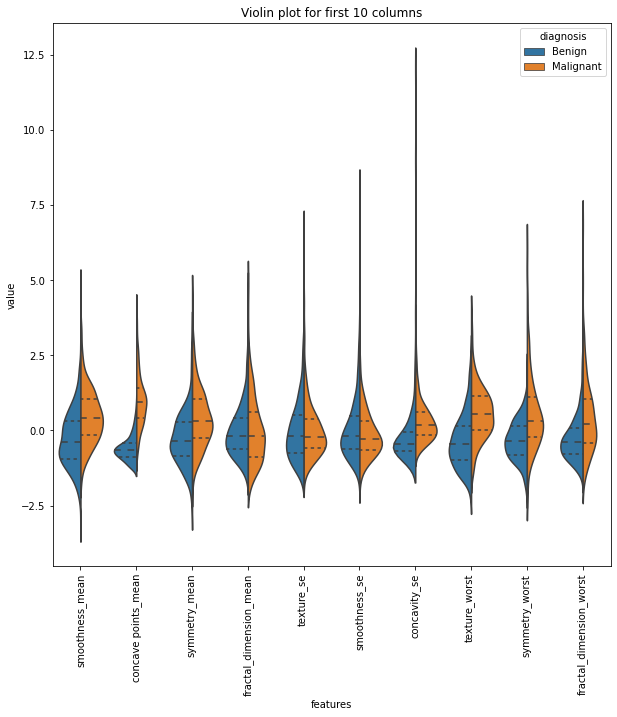

In [33]:
# Assign 'y' as the labels (diagnosis: 'M' or 'B') and 'x' as the features for the violin plot visualization.
data_diagnosis = y
data = x

# Standardize the feature data using mean normalization to make comparisons on the same scale.
data_new = (data - data.mean()) / (data.std())              

# Combine the standardized features with the diagnosis labels.
data = pd.concat([y, data_new.iloc[:, 0:10]], axis=1)

# Reshape the data for visualization purposes using the 'melt' function.
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

# Set up the violin plot for the first 10 columns/features.
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")

# Rotate x-axis labels for better visibility.
plt.xticks(rotation=90)

# Set the title for the plot.
plt.title("Violin plot for first 10 columns")

# Display the violin plot.
plt.show()

<div style="text-align: left;">
    <h5><strong>Heat map for our final data</strong></h5>
</div>

In [34]:
# Calculate the correlation matrix for the features (columns) in the DataFrame 'x'.
corr = x.corr()

# Define x and y axis labels for the heatmap.
x_labels = x.columns
y_labels = x.columns

# Replace the lower triangular part of the correlation matrix with None to avoid redundancy.
corr_np = corr.values
corr_np[np.tril_indices_from(corr_np, k=-1)] = None

# Create a heatmap figure using Plotly Express.
fig = go.Figure(data=go.Heatmap(
    z=corr_np,  # Use the modified correlation matrix without lower triangular values
    x=x_labels,  # x-axis labels (features)
    y=y_labels,  # y-axis labels (features)
    colorscale='Viridis_r',  # Set the color scale for the heatmap (reversed Viridis)
    zmin=-1,  # Set the minimum value of the color scale to -1
    zmax=1,   # Set the maximum value of the color scale to 1
    colorbar=dict(
        title='Correlation',  # Set the title for the color bar
        tickvals=[-1, -0.5, 0, 0.5, 1],  # Define tick values for the color bar
        ticktext=['-1', '-0.5', '0', '0.5', '1'],  # Define tick labels for the color bar
    )
))

# Set layout options for the heatmap.
fig.update_layout(
    title='Correlation Heatmap',  # Set the title of the heatmap
    xaxis=dict(title='Features'),  # Set the x-axis label
    yaxis=dict(title='Features'),  # Set the y-axis label
    width=900,  # Adjust the width of the plot
    height=800,  # Adjust the height of the plot
)

# Show the heatmap plot.
fig.show()


<div style="text-align: center;color: blue;">
    <h2>Machine Learning Models</h2>
</div>

<div style="text-align: left; color: red;">
    <h5><strong>Logistic Regression </strong></h5>
</div>

Logistic regression is a statistical method used for binary classification in machine learning. It's a type of regression analysis that predicts the probability that an instance belongs to a particular category.

**Sigmoid Function:**
The logistic regression model uses the sigmoid function (or logistic function) to squash the output of a linear equation between 0 and 1. 
The sigmoid function is defined as:σ(z) = 1/(1+e^-z)
where z is the linear combination of input features and model parameters.

**Hypothesis Function:**
The hypothesis function in logistic regression is defined as:hθ(x) = σ(θx)
where hθ(x) is the predicted probability that the dependent variable is 1 given the input features x,θ represents the model parameters, and θx is the dot product of the parameters and input features.

**Uses of Logistic Regression in Machine Learning:** 
1. Binary Classification 
2. Probability Estimation 
3. Interpretability 
4. Medical Diagnosis

<div style="text-align: left; color: red;">
    <h5><strong>Accuracy </strong></h5>
</div>

Accuracy score is a common metric used to evaluate the performance of a classification model in machine learning. It is a measure of the overall correctness of the model in predicting the classes of the instances. The accuracy score is calculated as the ratio of correctly predicted instances to the total number of instances in the dataset.

The formula for accuracuy is given by accuracy = Number of Correct Predictions/Total Number of Predictions


<div style="text-align: left; color: red;">
    <h5><strong>Confusion Matrix </strong></h5>
</div>

A confusion matrix is a table that is often used to evaluate the performance of a classification model. It summarizes the performance of a classification algorithm by presenting a tabulation of actual class labels against the predicted class labels. It is particularly useful for understanding the types and frequency of errors made by the model.

Here are the key components of a confusion matrix:

**True Positive (TP):** Instances that were correctly predicted as positive. For example, the model correctly identified 50 positive instances.

**True Negative (TN):** Instances that were correctly predicted as negative. For example, the model correctly identified 30 negative instances.

**False Positive (FP):** Instances that were incorrectly predicted as positive. Also known as a Type I error. For example, the model predicted 20 instances as positive when they were actually negative.

**False Negative (FN):** Instances that were incorrectly predicted as negative. Also known as a Type II error. For example, the model predicted 10 instances as negative when they were actually positive.

Accuracy = TP+TN/(TP+TN+FP+FN)

precision(Positive Predective Value) = TP/(TP+FP)

Recall(Sensitivity,  True Positive Rate) = TP/(TP+FN)

Specificity (True Negative Rate) = TN/(TN+FP)

F1 Score = 2*(Precision.Recall/(Precision+Recall))

Accuracy: 0.9707602339181286


Confusion Matrix:


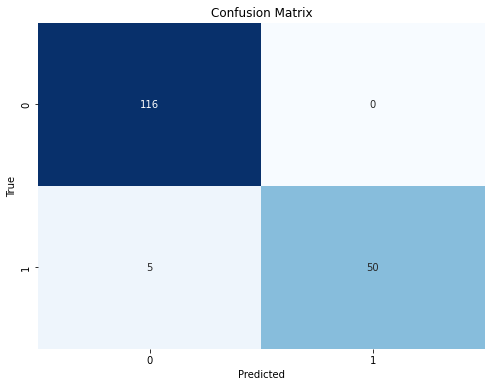

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       116
   Malignant       1.00      0.91      0.95        55

    accuracy                           0.97       171
   macro avg       0.98      0.95      0.97       171
weighted avg       0.97      0.97      0.97       171



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' contains your dataset

# Separate features and target variable
Cancer_data = df.drop("diagnosis", axis=1)
Cancer_type = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Cancer_data, Cancer_type, test_size=0.3, random_state=7)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}\n\n")
print("Confusion Matrix:")
#print(conf_matrix)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Classification Report:")
print(classification_rep)


<div style="text-align: right; color: green;">
    <h5><strong> The accuracy for logistic model is 97</strong> </h5>
</div>

<div style="text-align: left; color: red;">
    <h5><strong> K-Nearest Neighbor </strong></h5>
</div>

The k-Nearest Neighbors (k-NN) algorithm is a simple and versatile classification or regression algorithm used in machine learning. It's a type of instance-based learning, where the model doesn't explicitly learn a mapping from inputs to outputs during a training phase. Instead, it memorizes the training instances and makes predictions based on the proximity of new instances to the existing data points.

**k Neighbors :** The "k" in k-NN represents the number of nearest neighbors to consider when making a prediction.
For a given data point, the algorithm identifies the k nearest neighbors based on a distance metric (commonly Euclidean distance).

**Voting (Classification) or Averaging (Regression) :** For classification, the majority class among the k neighbors is assigned to the new data point.For regression, the algorithm calculates the average (or weighted average) of the target values of the k neighbors.

**Steps in k-NN:**
1. Choose the Value of k
2. Calculate Distance
3. Identify Neighbors
4. Make Prediction

**Uses of k-NN in Machine Learning :**
1. Classification
2. Regression
3. Anomaly Detection
4. Recommendation Systems
5. Pattern Recognition


Accuracy: 0.9649122807017544


Confusion Matrix:


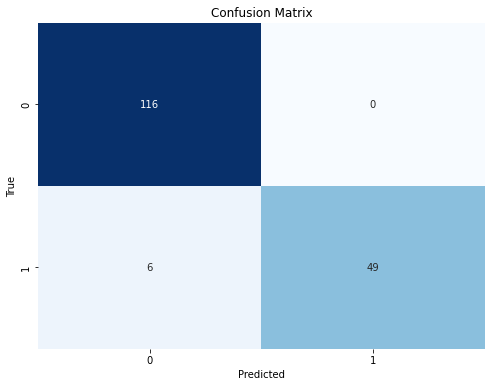

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       116
   Malignant       1.00      0.89      0.94        55

    accuracy                           0.96       171
   macro avg       0.98      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' contains your dataset

# Separate features and target variable
Cancer_data = df.drop("diagnosis", axis=1)
Cancer_type = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Cancer_data, Cancer_type, test_size=0.3, random_state=7)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a k-Nearest Neighbors model
k_value = 5  # You can adjust the value of k as needed
knn_model = KNeighborsClassifier(n_neighbors=k_value)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}\n\n")
print("Confusion Matrix:")
#print(conf_matrix)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Classification Report:")
print(classification_rep)


<div style="text-align: right; color: green;">
    <h5><strong>The accuracy for KNN model is 96</strong>  </h5>
</div>

<div style="text-align: left; color: red;">
    <h5><strong> Random Forest Classification </strong></h5>
</div>

Random Forest is an ensemble learning method that can be used for both classification and regression tasks in machine learning. It is a powerful and versatile algorithm that operates by constructing a multitude of decision trees during training and outputting the class that is the mode (classification) or mean (regression) of the individual trees.

**Decision Trees :** Random Forest is an ensemble of decision trees. Each tree is constructed using a random subset of the features and a random subset of the training data.

**Bootstrap Aggregating (Bagging) :** The algorithm uses a technique called bagging, where multiple decision trees are trained independently on different subsets of the training data. This helps reduce overfitting and improve generalization.

**Random Feature Selection :** At each node of a decision tree, a random subset of features is considered for splitting. This randomness further contributes to the diversity of the trees.

**Voting or Averaging :** For classification tasks, the final prediction is determined by a majority vote among the trees. For regression tasks, it's the average of the predictions.

**Uses of Random Forest in Machine Learning:**
1. Classification
2. Regression
3. Feature Importance
4. Anomaly Detection
5. Image and Speech Recognition
    

Accuracy: 0.9883040935672515


Confusion Matrix:


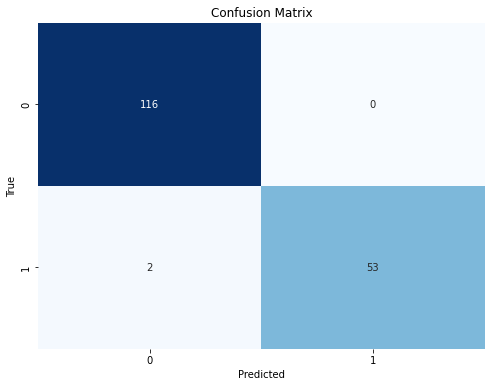

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       116
   Malignant       1.00      0.96      0.98        55

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' contains your dataset

# Separate features and target variable
Cancer_data = df.drop("diagnosis", axis=1)
Cancer_type = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Cancer_data, Cancer_type, test_size=0.3, random_state=7)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}\n\n")
print("Confusion Matrix:")
#print(conf_matrix)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Classification Report:")
print(classification_rep)


<div style="text-align: right; color: green;">
    <h5><strong> The accuracy for Random Forest Classifier model is 98</strong> </h5>
</div>

<div style="text-align: left; color: red;">
    <h5><strong> Support Vector Classification </strong></h5>
</div>

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. SVM is particularly effective in high-dimensional spaces and is well-suited for scenarios where a clear margin of separation exists between different classes.

**Hyperplane :** SVM works by finding the hyperplane that best separates the data into different classes. A hyperplane is a decision boundary that maximizes the margin between the classes.

**Margin :** The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to find the hyperplane with the maximum margin.

**Support Vectors :** Support vectors are the data points that are closest to the hyperplane and play a crucial role in defining the decision boundary.

**Kernel Trick :** SVM can handle non-linear decision boundaries by using a kernel trick. The kernel function transforms the input features into a higher-dimensional space, making it possible to find a hyperplane in that space.



**Uses of SVM in Machine Learning:**
1. Classification
2. Regression
3. Image Classification
4. Handwriting Recognition
5. Bioinformatics


Accuracy: 0.9707602339181286


Confusion Matrix:


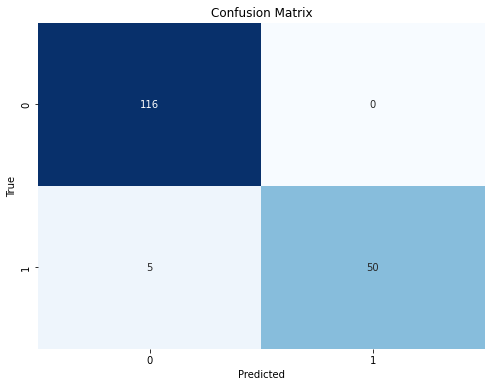

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       116
   Malignant       1.00      0.91      0.95        55

    accuracy                           0.97       171
   macro avg       0.98      0.95      0.97       171
weighted avg       0.97      0.97      0.97       171



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming 'df' contains your dataset

# Separate features and target variable
Cancer_data = df.drop("diagnosis", axis=1)
Cancer_type = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Cancer_data, Cancer_type, test_size=0.3, random_state=7)

# Standardize the features using StandardScaler (SVMs are sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=7)  # 'rbf' kernel is commonly used

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}\n\n")
print("Confusion Matrix:")
#print(conf_matrix)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Classification Report:")
print(classification_rep)


<div style="text-align: right; color: green;">
    <h5><strong> The accuracy for SVC model is 97</strong> </h5>
</div>

<div style="text-align: left; color: red;">
    <h5><strong> Decision Tree Classification </strong></h5>
</div>

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the values of different features, ultimately leading to a structure resembling a tree. Each internal node of the tree represents a decision based on a particular feature, and each leaf node represents the predicted outcome.

**Root Node :** The top node of the tree, from which the tree starts branching.

**Internal Nodes :** Nodes that represent decisions based on the values of specific features.

**Leaves :** Terminal nodes that provide the final predictions or outcomes.

**Decision Rules :** The conditions at each node that determine the path to follow.

**Splitting :** The process of dividing the data into subsets based on the values of features.

**Entropy (for Classification) or Variance (for Regression) :** Decision trees aim to minimize entropy or variance at each node, leading to better separation of classes or better predictions.


**Uses of Decision Trees in Machine Learning:**
1. Classification
2. Regression
3. Natural Language Processing (NLP)
4. Customer Relationship Management (CRM)

Accuracy: 0.9122807017543859


Confusion Matrix:


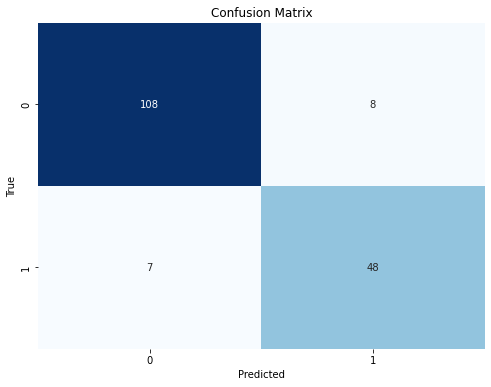

Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.93      0.94       116
   Malignant       0.86      0.87      0.86        55

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' contains your dataset

# Separate features and target variable
Cancer_data = df.drop("diagnosis", axis=1)
Cancer_type = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Cancer_data, Cancer_type, test_size=0.3, random_state=7)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=7)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}\n\n")
print("Confusion Matrix:")
#print(conf_matrix)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Classification Report:")
print(classification_rep)


<div style="text-align: right; color: green;">
    <h5><strong> The accuracy for SVC model is 91</strong> </h5>
</div>

<div style="text-align: left; color: red;">
    <h5><strong> Gaussian Naive Bayes </strong></h5>
</div>

Gaussian Naive Bayes (Gaussian NB) is a probabilistic classification algorithm based on Bayes' theorem. It is a type of Naive Bayes classifier that assumes the features are normally distributed. The term "naive" is used because the algorithm makes the assumption that the features are conditionally independent, given the class label. Despite this simplifying assumption, Gaussian NB is known to perform well in practice, especially in situations where the independence assumption is not severely violated.

**Bayes' Theorem :** The algorithm is based on Bayes' theorem, which calculates the probability of a hypothesis given the evidence. In the context of classification
P(C|X) = P(X|C).P(C)/P(X)

where C is the class label, X is the set of features,P(C∣X) is the probability of class C given the features X,P(X∣C) is the likelihood of the features given the class, P(C) is the prior probability of class C, and () P(X) is the probability of the features.

**Naive Assumption :** The "naive" assumption in Gaussian NB is that the features are conditionally independent given the class label. This assumption simplifies the calculation of the likelihood term.

**Gaussian Distribution :** Gaussian NB assumes that the continuous features follow a Gaussian (normal) distribution.

**Uses of Gaussian Naive Bayes in Machine Learning:**
1. Spam Filtering
2. Face Recognition
3. Fault Diagnosis
4. Character Recognition

Accuracy: 0.6783625730994152


Confusion Matrix:


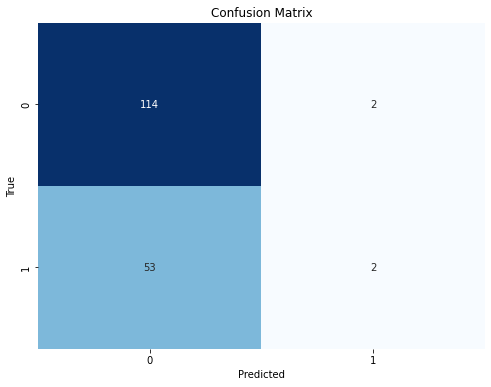

Classification Report:
              precision    recall  f1-score   support

      Benign       0.68      0.98      0.81       116
   Malignant       0.50      0.04      0.07        55

    accuracy                           0.68       171
   macro avg       0.59      0.51      0.44       171
weighted avg       0.62      0.68      0.57       171



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' contains your dataset

# Separate features and target variable
Cancer_data = df.drop("diagnosis", axis=1)
Cancer_type = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Cancer_data, Cancer_type, test_size=0.3, random_state=7)

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}\n\n")
print("Confusion Matrix:")
#print(conf_matrix)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Classification Report:")
print(classification_rep)


<div style="text-align: right; color: green;">
    <h5><strong> The accuracy for Gaussian Naive Bayes model is 67 </strong> </h5>
</div>